In [1]:
import numpy as np

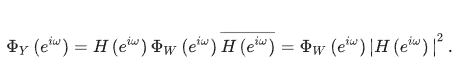

In [2]:
def H(q, b_1, b_2):
    return 1 + b_1 * q**(-1) + b_2 * q**(-2)

def Phi_Y(omega, b_1, b_2, sigma2):
    return sigma2 * np.abs(H(np.exp(1j*omega), b_1, b_2))**2

b_1 = 1
b_2 = 1
sigma2 = 1
omega = 0

Phi_Y(omega, b_1, b_2, sigma2)

9.0